In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('homeprices_banglore.csv')

In [23]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [24]:
from sklearn import preprocessing

In [25]:
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis=1))
scaled_Y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

scaled_Y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [26]:
np.ones(scaled_X.shape[1])

array([1., 1.])

In [30]:
scaled_X.T.dot(scaled_Y)

array([[4.25003556],
       [4.64827778]])

In [77]:
def batch_gradient_decent(X,y_true,epochs,learning_rate=0.01):
    number_of_features = scaled_X.shape[1]
    w = np.ones(scaled_X.shape[1])
    b = 0
    total_samples = X.shape[0]
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%5==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [90]:
w, b, cost, cost_list, epoch_list = batch_gradient_decent(scaled_X,scaled_Y.reshape(scaled_Y.shape[0],),epochs=500)




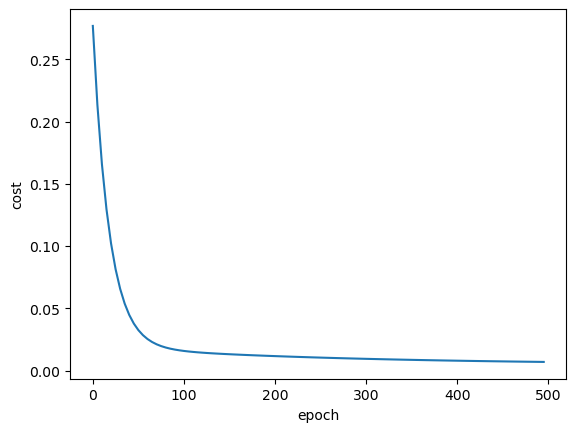

In [91]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list, cost_list)